# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from base_models import BaseModel
from model_creator import Optimizer, MTLApproach
from model_evaluator import DataSource, DataPredSelection

# Start Network runner

In [4]:
kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 50 epochs - using second approach of handcrafted method,' + \
            'which splits the ICAO reqs and its branches into previously determined groups. Removing rotation from operations of data augmentation' + \
            ' and using minor shift (width and height).',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl', '50 epochs', 'handcrafted_2'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'mtl_approach': MTLApproach.HAND_2,
        'reqs': list(cts.ICAO_REQ),
        'aligned': False,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 32,
        'n_epochs': 2,
        'early_stopping': 50,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 90158
Process ID: 90436
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 50 '
                               'epochs - using second approach of handcrafted '
                               'method,which splits the ICAO reqs and its '
                               'branches into previously determined groups. '
                               'Removing rotation from operations of data '
                               'augmentation and using minor shift (width and '
                               'height).',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'mtl',
                         '50 epochs',
 

# Load Data

In [5]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [6]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [7]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [8]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [9]:
runner.setup_experiment()

-------------------- create experiment -------------------
Not using Neptune


# Labels Distribution

In [10]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Requisite: MOUTH
N_TRAIN_COMP: 3607 (73.19%)
N_TRAIN_NOT_COMP: 1321 (26.81%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 420 (76.78%)
N_VALIDATION_NOT_COMP: 127 (23.22%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 215 (74.65%)
N_TEST_NOT_COMP: 73 (25.35%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: ROTATION
N_TRAIN_COMP: 3716 (75.41%)
N_TRAIN_NOT_COMP: 1212 (24.59%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 410 (74.95%)
N_VALIDATION_NOT_COMP: 137 (25.05%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 208 (72.22%)
N_TEST_NOT_COMP: 80 (27.78%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: L_AWAY
N_TRAIN_COMP: 3375 (68.49%)
N_TRAIN_NOT_COMP: 1553 (31.51%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 382 (69.84%)
N_VALIDATION_NOT_COMP: 165 (30.16%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 201 (69.79%)
N_TEST_NOT_COMP: 87 (30.21%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: EYES_CLOSED
N_TRAIN_COMP: 3887 (78.88%)
N_TRAIN_NOT_COMP: 1041 (21.12%)
N_TRAIN_D

# Create Model

In [11]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


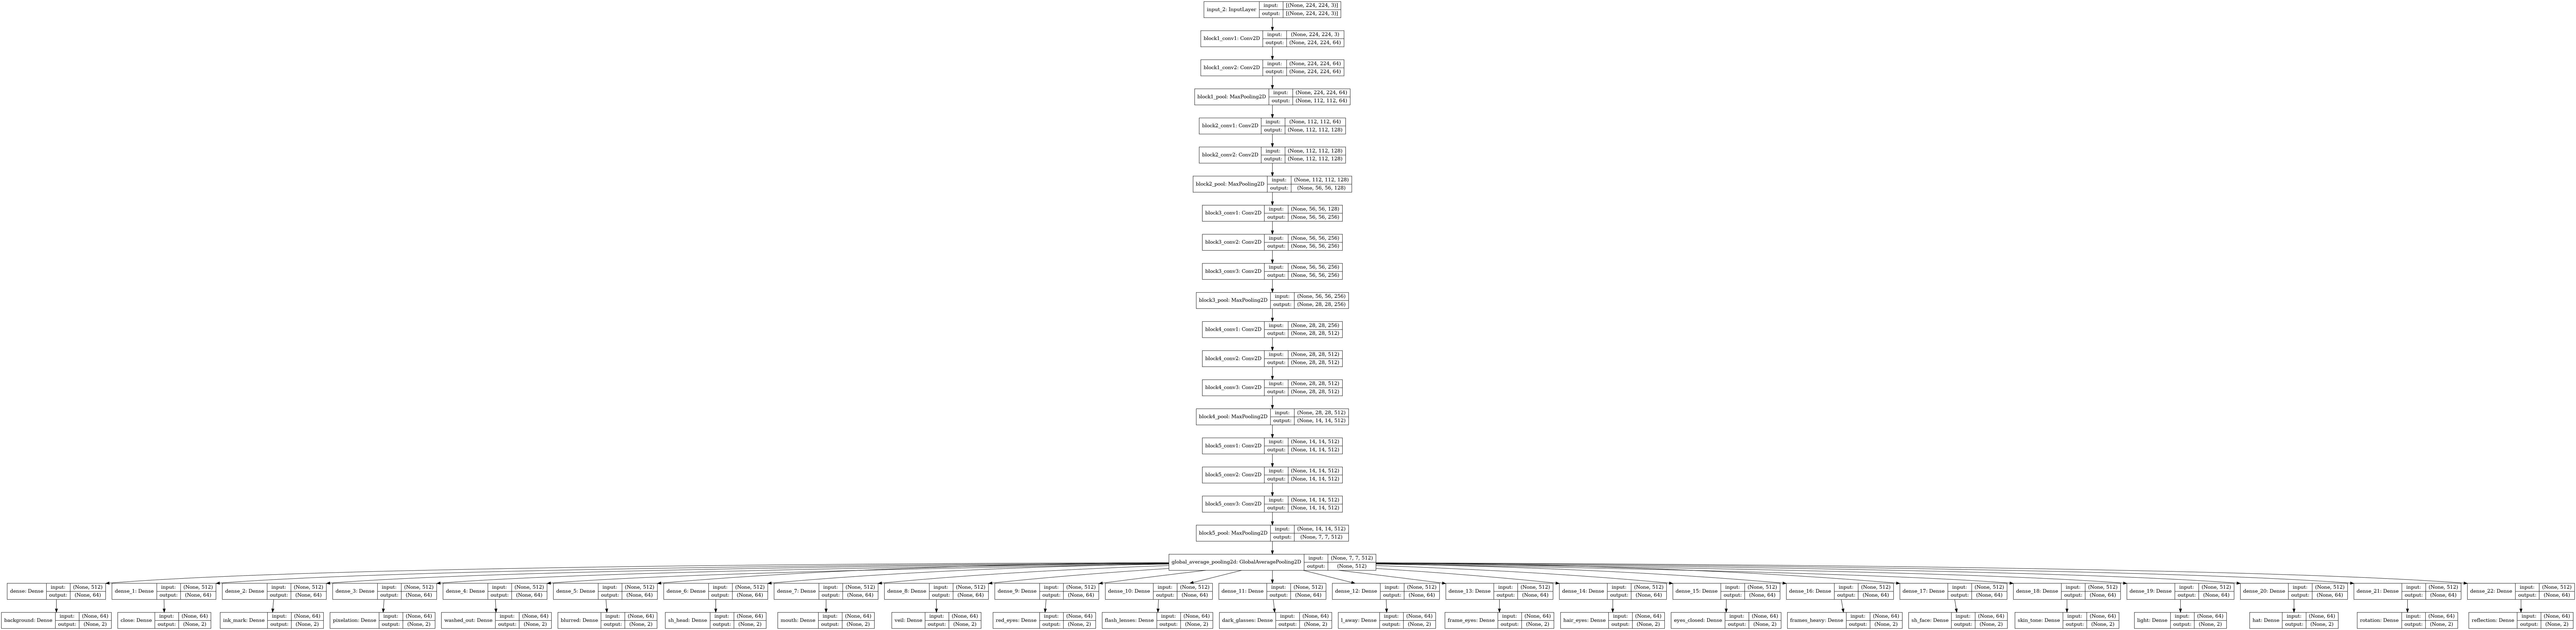

In [12]:
runner.vizualize_model(outfile_path=f"figs/handcrafted_mtl_model_2.png")

In [13]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Training Model

In [ ]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 15,472,814
  .. Trainable params: 758,126
  .. Non-trainable params: 14,714,688
Epoch 1/2
 28/154 [====>.........................] - ETA: 5:27 - loss: 1.8745 - background_loss: 1.1087 - close_loss: 0.6773 - ink_mark_loss: 2.0012 - pixelation_loss: 0.9625 - washed_out_loss: 0.0983 - blurred_loss: 0.7237 - sh_head_loss: 0.5520 - mouth_loss: 0.2599 - veil_loss: 0.9195 - red_eyes_loss: 0.8960 - flash_lenses_loss: 1.0634 - dark_glasses_loss: 0.8722 - l_away_loss: 0.3564 - frame_eyes_loss: 0.8588 - hair_eyes_loss: 0.8386 - eyes_closed_loss: 1.2137 - frames_heavy_loss: 0.6383 - sh_face_loss: 1.4024 - skin_tone_loss: 0.2084 - light_loss: 0.4292 - hat_loss: 0.9627 - rotation_loss: 1.0325 - reflection_loss: 0.6693 - background_accuracy: 0.7288 - close_accuracy: 0.6752 - ink_mark_accuracy: 0.6362 - pixelation_accuracy: 0.7366 - washed_out_accuracy: 0.9833 - blurred_accu

# Plots

-------------------- draw training history -------------------


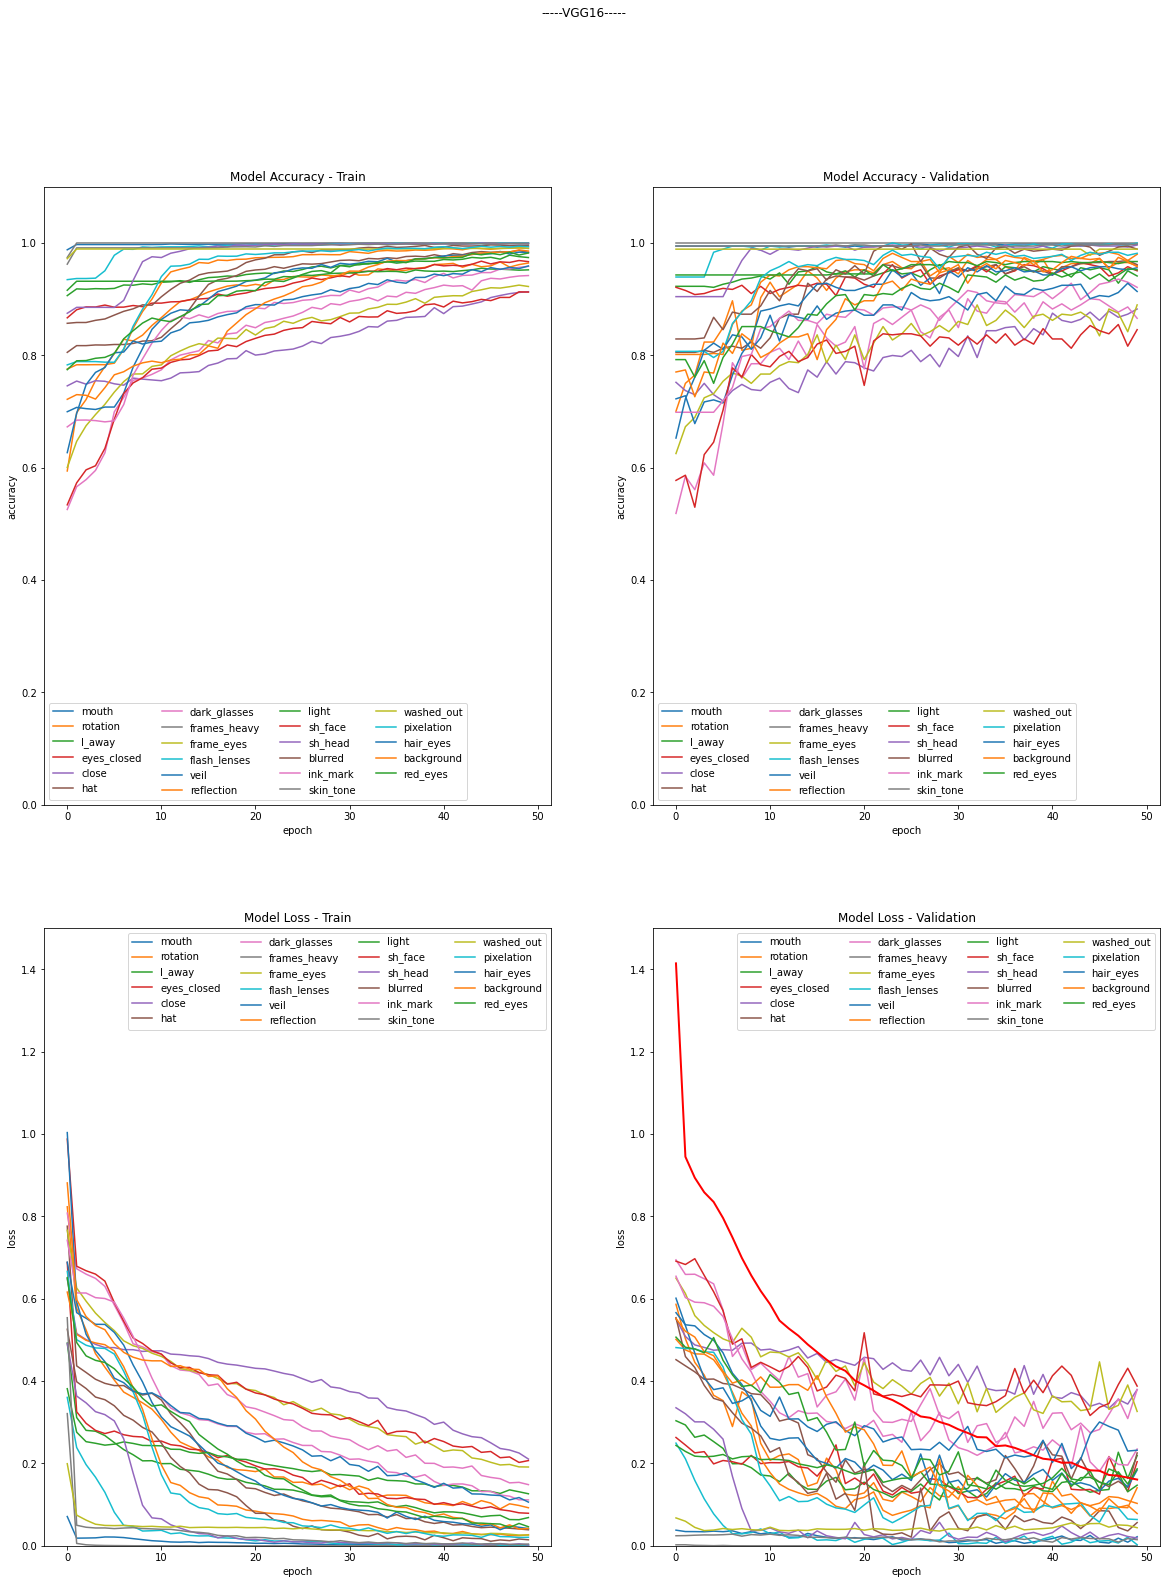

In [14]:
runner.draw_training_history()

# Load Best Model

In [15]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [16]:
runner.save_model()

-------------------- save model -------------------
Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

Testing Trained Model
Predicting labels....
18/18 [==============================] - 32s 2s/step
Prediction finished!
Requisite: MOUTH


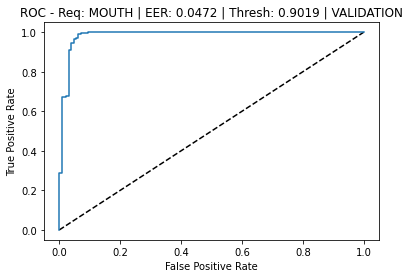

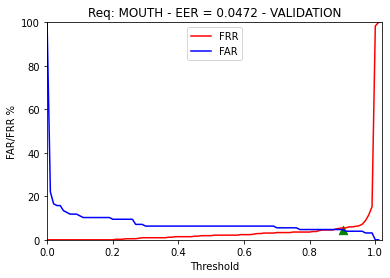

Requisite: MOUTH - EER_interp: 4.72% - Best Threshold: 0.9019489884388395
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.84      0.95      0.89       127
    COMPLIANT       0.99      0.95      0.96       420

     accuracy                           0.95       547
    macro avg       0.91      0.95      0.93       547
 weighted avg       0.95      0.95      0.95       547

Confusion matrix ----------------------------------------
FAR: 4.72% | FRR: 5.48% | EER_mean: 5.1% | TP: 397 | TN: 121 | FP: 6 | FN: 23
Accuracy ------------------------------------------------
Model Accuracy: 94.69999999999999%
---------------------------------------------------------
Requisite: ROTATION


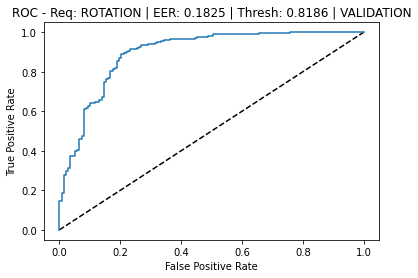

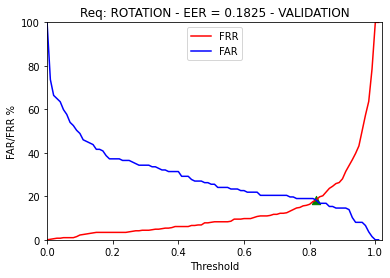

Requisite: ROTATION - EER_interp: 18.25% - Best Threshold: 0.8185890316959393
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.60      0.82      0.69       137
    COMPLIANT       0.93      0.82      0.87       410

     accuracy                           0.82       547
    macro avg       0.77      0.82      0.78       547
 weighted avg       0.85      0.82      0.83       547

Confusion matrix ----------------------------------------
FAR: 18.25% | FRR: 18.05% | EER_mean: 18.15% | TP: 336 | TN: 112 | FP: 25 | FN: 74
Accuracy ------------------------------------------------
Model Accuracy: 81.89999999999999%
---------------------------------------------------------
Requisite: L_AWAY


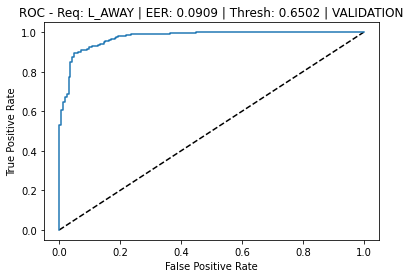

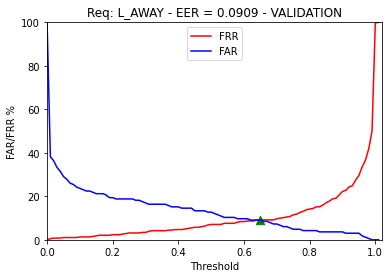

Requisite: L_AWAY - EER_interp: 9.09% - Best Threshold: 0.6501653790484258
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.81      0.91      0.86       165
    COMPLIANT       0.96      0.91      0.93       382

     accuracy                           0.91       547
    macro avg       0.88      0.91      0.89       547
 weighted avg       0.91      0.91      0.91       547

Confusion matrix ----------------------------------------
FAR: 9.09% | FRR: 9.16% | EER_mean: 9.120000000000001% | TP: 347 | TN: 150 | FP: 15 | FN: 35
Accuracy ------------------------------------------------
Model Accuracy: 90.86%
---------------------------------------------------------
Requisite: EYES_CLOSED


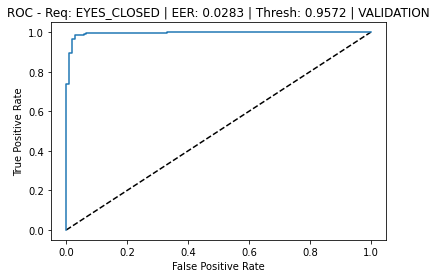

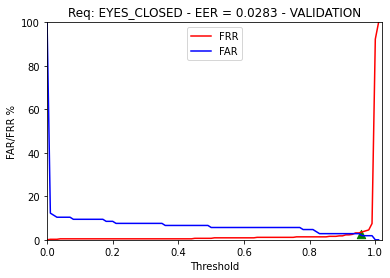

Requisite: EYES_CLOSED - EER_interp: 2.83% - Best Threshold: 0.9571989178657683
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.88      0.97      0.92       106
    COMPLIANT       0.99      0.97      0.98       441

     accuracy                           0.97       547
    macro avg       0.94      0.97      0.95       547
 weighted avg       0.97      0.97      0.97       547

Confusion matrix ----------------------------------------
FAR: 2.83% | FRR: 3.17% | EER_mean: 3.0% | TP: 427 | TN: 103 | FP: 3 | FN: 14
Accuracy ------------------------------------------------
Model Accuracy: 96.89%
---------------------------------------------------------
Requisite: CLOSE


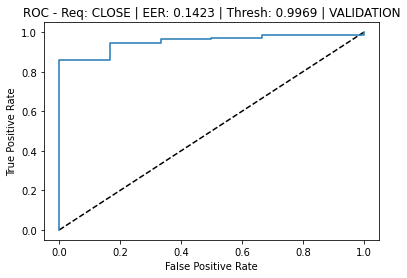

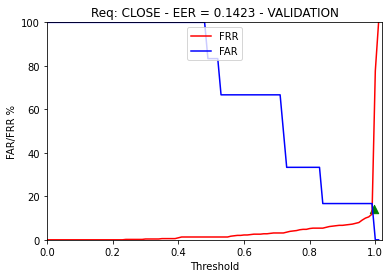

Requisite: CLOSE - EER_interp: 14.23% - Best Threshold: 0.9968750243266277
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.07      1.00      0.13         6
    COMPLIANT       1.00      0.86      0.92       541

     accuracy                           0.86       547
    macro avg       0.54      0.93      0.53       547
 weighted avg       0.99      0.86      0.91       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 14.23% | EER_mean: 7.12% | TP: 464 | TN: 6 | FP: 0 | FN: 77
Accuracy ------------------------------------------------
Model Accuracy: 85.92%
---------------------------------------------------------
Requisite: HAT


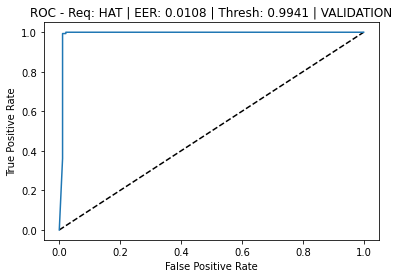

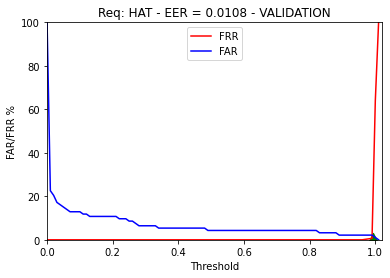

Requisite: HAT - EER_interp: 1.08% - Best Threshold: 0.9940648674963183
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.97      0.99      0.98        93
    COMPLIANT       1.00      0.99      1.00       454

     accuracy                           0.99       547
    macro avg       0.98      0.99      0.99       547
 weighted avg       0.99      0.99      0.99       547

Confusion matrix ----------------------------------------
FAR: 1.08% | FRR: 0.66% | EER_mean: 0.8699999999999999% | TP: 451 | TN: 92 | FP: 1 | FN: 3
Accuracy ------------------------------------------------
Model Accuracy: 99.27%
---------------------------------------------------------
Requisite: DARK_GLASSES


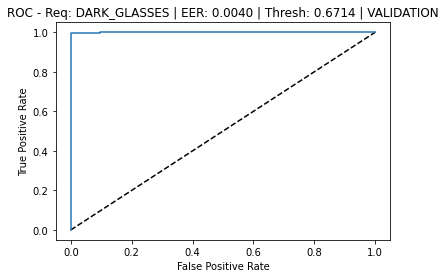

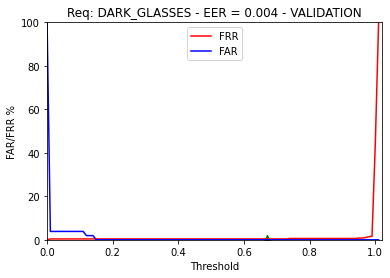

Requisite: DARK_GLASSES - EER_interp: 0.4% - Best Threshold: 0.6713911264833782
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.96      1.00      0.98        52
    COMPLIANT       1.00      1.00      1.00       495

     accuracy                           1.00       547
    macro avg       0.98      1.00      0.99       547
 weighted avg       1.00      1.00      1.00       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 0.4% | EER_mean: 0.2% | TP: 493 | TN: 52 | FP: 0 | FN: 2
Accuracy ------------------------------------------------
Model Accuracy: 99.63%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


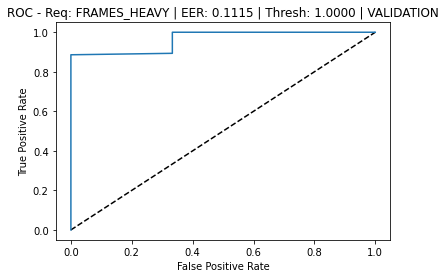

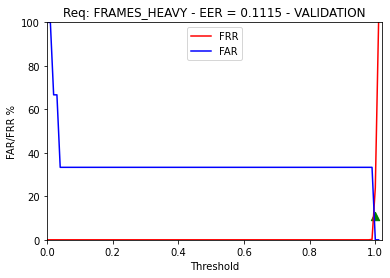

Requisite: FRAMES_HEAVY - EER_interp: 11.15% - Best Threshold: 0.9999988872370273
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.05      1.00      0.09         3
    COMPLIANT       1.00      0.89      0.94       544

     accuracy                           0.89       547
    macro avg       0.52      0.94      0.51       547
 weighted avg       0.99      0.89      0.93       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 11.4% | EER_mean: 5.7% | TP: 482 | TN: 3 | FP: 0 | FN: 62
Accuracy ------------------------------------------------
Model Accuracy: 88.67%
---------------------------------------------------------
Requisite: FRAME_EYES


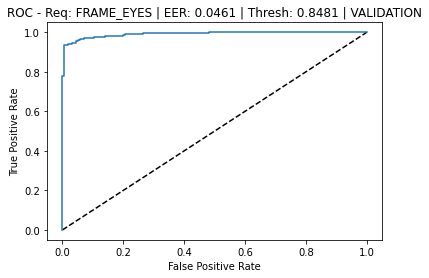

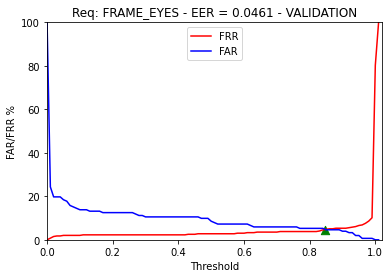

Requisite: FRAME_EYES - EER_interp: 4.61% - Best Threshold: 0.8481438159928776
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.89      0.95      0.92       152
    COMPLIANT       0.98      0.95      0.97       395

     accuracy                           0.95       547
    macro avg       0.94      0.95      0.94       547
 weighted avg       0.96      0.95      0.95       547

Confusion matrix ----------------------------------------
FAR: 4.61% | FRR: 4.5600000000000005% | EER_mean: 4.58% | TP: 377 | TN: 145 | FP: 7 | FN: 18
Accuracy ------------------------------------------------
Model Accuracy: 95.43%
---------------------------------------------------------
Requisite: FLASH_LENSES


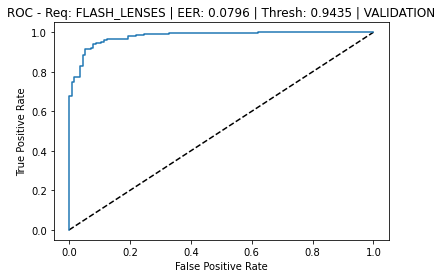

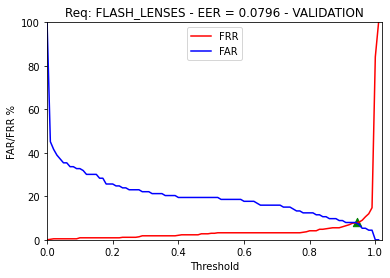

Requisite: FLASH_LENSES - EER_interp: 7.960000000000001% - Best Threshold: 0.9434989094744421
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.75      0.92      0.83       113
    COMPLIANT       0.98      0.92      0.95       434

     accuracy                           0.92       547
    macro avg       0.86      0.92      0.89       547
 weighted avg       0.93      0.92      0.92       547

Confusion matrix ----------------------------------------
FAR: 7.960000000000001% | FRR: 8.06% | EER_mean: 8.01% | TP: 399 | TN: 104 | FP: 9 | FN: 35
Accuracy ------------------------------------------------
Model Accuracy: 91.96%
---------------------------------------------------------
Requisite: VEIL


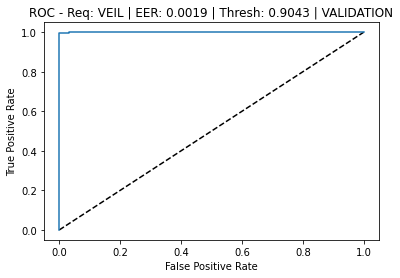

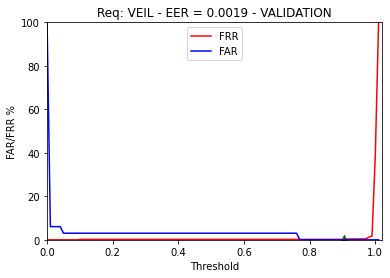

Requisite: VEIL - EER_interp: 0.19% - Best Threshold: 0.90432028594184
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.97      1.00      0.99        33
    COMPLIANT       1.00      1.00      1.00       514

     accuracy                           1.00       547
    macro avg       0.99      1.00      0.99       547
 weighted avg       1.00      1.00      1.00       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 0.19% | EER_mean: 0.1% | TP: 513 | TN: 33 | FP: 0 | FN: 1
Accuracy ------------------------------------------------
Model Accuracy: 99.82%
---------------------------------------------------------
Requisite: REFLECTION


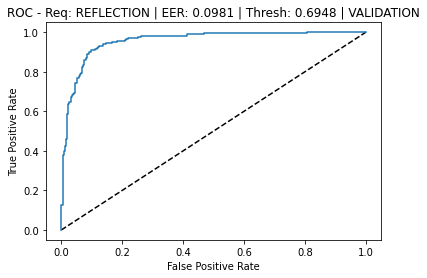

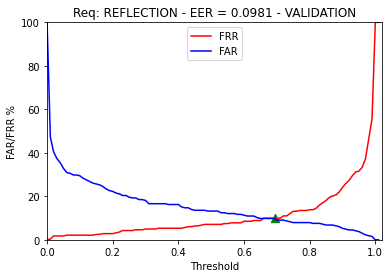

Requisite: REFLECTION - EER_interp: 9.81% - Best Threshold: 0.6947839856156489
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.90      0.90      0.90       265
    COMPLIANT       0.91      0.90      0.90       282

     accuracy                           0.90       547
    macro avg       0.90      0.90      0.90       547
 weighted avg       0.90      0.90      0.90       547

Confusion matrix ----------------------------------------
FAR: 9.81% | FRR: 9.93% | EER_mean: 9.87% | TP: 254 | TN: 239 | FP: 26 | FN: 28
Accuracy ------------------------------------------------
Model Accuracy: 90.13%
---------------------------------------------------------
Requisite: LIGHT


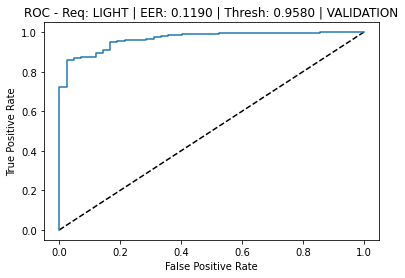

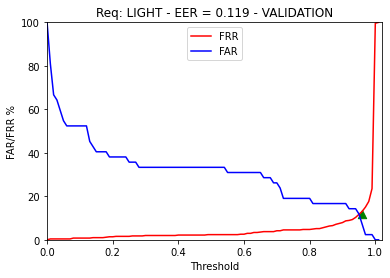

Requisite: LIGHT - EER_interp: 11.899999999999999% - Best Threshold: 0.9580125808715984
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.37      0.88      0.52        42
    COMPLIANT       0.99      0.87      0.93       505

     accuracy                           0.87       547
    macro avg       0.68      0.88      0.72       547
 weighted avg       0.94      0.87      0.90       547

Confusion matrix ----------------------------------------
FAR: 11.899999999999999% | FRR: 12.67% | EER_mean: 12.280000000000001% | TP: 441 | TN: 37 | FP: 5 | FN: 64
Accuracy ------------------------------------------------
Model Accuracy: 87.39%
---------------------------------------------------------
Requisite: SH_FACE


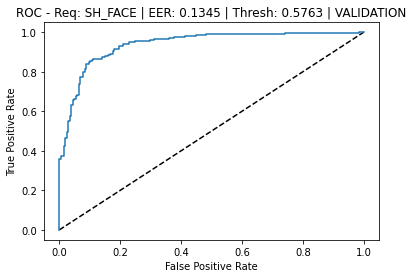

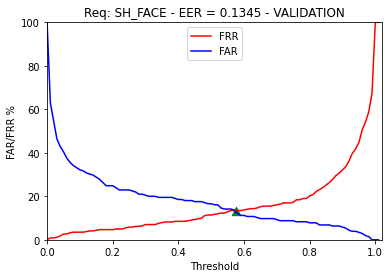

Requisite: SH_FACE - EER_interp: 13.450000000000001% - Best Threshold: 0.5762793735454257
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.80      0.87      0.83       205
    COMPLIANT       0.92      0.87      0.89       342

     accuracy                           0.87       547
    macro avg       0.86      0.87      0.86       547
 weighted avg       0.87      0.87      0.87       547

Confusion matrix ----------------------------------------
FAR: 12.68% | FRR: 13.450000000000001% | EER_mean: 13.059999999999999% | TP: 296 | TN: 179 | FP: 26 | FN: 46
Accuracy ------------------------------------------------
Model Accuracy: 86.83999999999999%
---------------------------------------------------------
Requisite: SH_HEAD


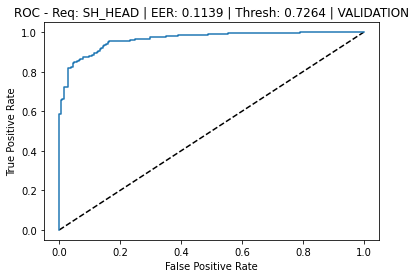

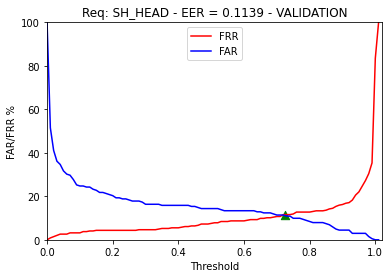

Requisite: SH_HEAD - EER_interp: 11.39% - Best Threshold: 0.7263797521627512
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.82      0.89      0.85       202
    COMPLIANT       0.93      0.88      0.91       345

     accuracy                           0.88       547
    macro avg       0.87      0.89      0.88       547
 weighted avg       0.89      0.88      0.89       547

Confusion matrix ----------------------------------------
FAR: 11.39% | FRR: 11.59% | EER_mean: 11.49% | TP: 305 | TN: 179 | FP: 23 | FN: 40
Accuracy ------------------------------------------------
Model Accuracy: 88.48%
---------------------------------------------------------
Requisite: BLURRED


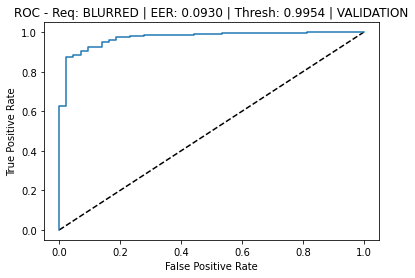

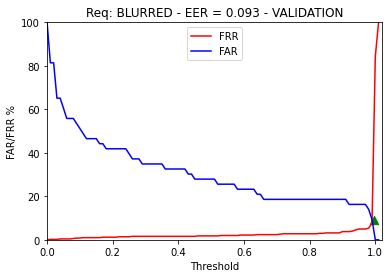

Requisite: BLURRED - EER_interp: 9.3% - Best Threshold: 0.99539572000504
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.45      0.91      0.60        43
    COMPLIANT       0.99      0.90      0.95       504

     accuracy                           0.90       547
    macro avg       0.72      0.91      0.77       547
 weighted avg       0.95      0.90      0.92       547

Confusion matrix ----------------------------------------
FAR: 9.3% | FRR: 9.520000000000001% | EER_mean: 9.41% | TP: 456 | TN: 39 | FP: 4 | FN: 48
Accuracy ------------------------------------------------
Model Accuracy: 90.49000000000001%
---------------------------------------------------------
Requisite: SKIN_TONE


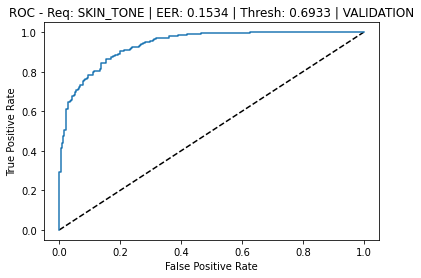

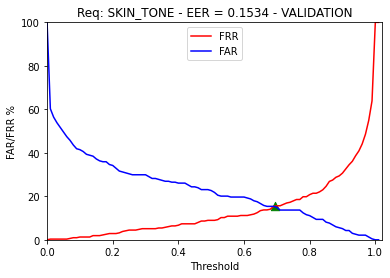

Requisite: SKIN_TONE - EER_interp: 15.340000000000002% - Best Threshold: 0.6932701217100092
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.81      0.85      0.83       234
    COMPLIANT       0.88      0.85      0.86       313

     accuracy                           0.85       547
    macro avg       0.84      0.85      0.85       547
 weighted avg       0.85      0.85      0.85       547

Confusion matrix ----------------------------------------
FAR: 14.96% | FRR: 15.340000000000002% | EER_mean: 15.15% | TP: 265 | TN: 199 | FP: 35 | FN: 48
Accuracy ------------------------------------------------
Model Accuracy: 84.83000000000001%
---------------------------------------------------------
Requisite: WASHED_OUT


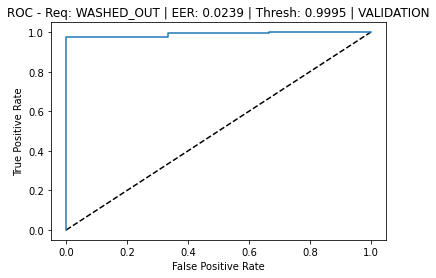

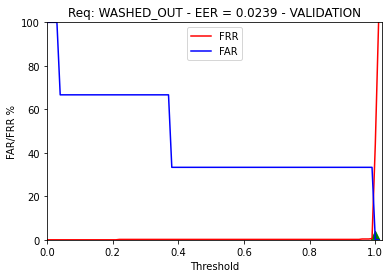

Requisite: WASHED_OUT - EER_interp: 2.39% - Best Threshold: 0.9994957603733329
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.19      1.00      0.32         3
    COMPLIANT       1.00      0.98      0.99       544

     accuracy                           0.98       547
    macro avg       0.59      0.99      0.65       547
 weighted avg       1.00      0.98      0.98       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 2.39% | EER_mean: 1.2% | TP: 531 | TN: 3 | FP: 0 | FN: 13
Accuracy ------------------------------------------------
Model Accuracy: 97.61999999999999%
---------------------------------------------------------
Requisite: PIXELATION


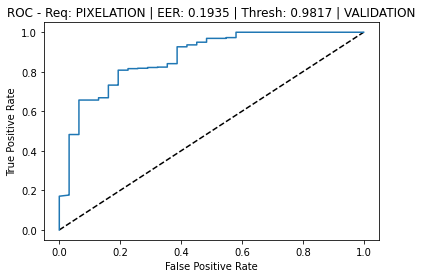

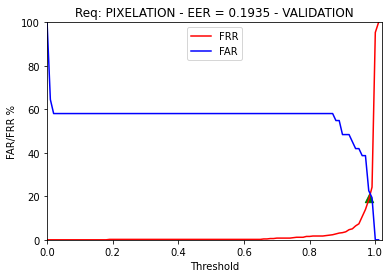

Requisite: PIXELATION - EER_interp: 19.35% - Best Threshold: 0.9817203283309914
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.20      0.81      0.32        31
    COMPLIANT       0.99      0.81      0.89       516

     accuracy                           0.81       547
    macro avg       0.59      0.81      0.61       547
 weighted avg       0.94      0.81      0.86       547

Confusion matrix ----------------------------------------
FAR: 19.35% | FRR: 19.189999999999998% | EER_mean: 19.27% | TP: 417 | TN: 25 | FP: 6 | FN: 99
Accuracy ------------------------------------------------
Model Accuracy: 80.80000000000001%
---------------------------------------------------------
Requisite: HAIR_EYES


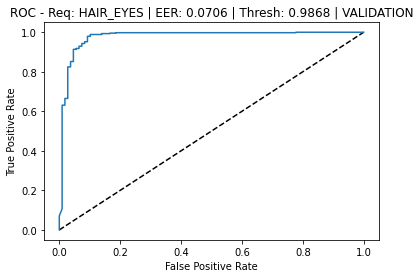

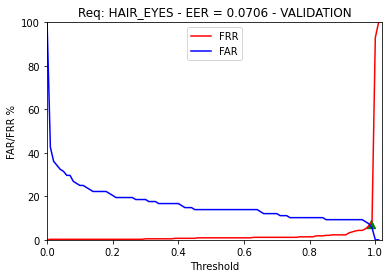

Requisite: HAIR_EYES - EER_interp: 7.06% - Best Threshold: 0.9868362222825747
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.77      0.94      0.84       108
    COMPLIANT       0.98      0.93      0.96       439

     accuracy                           0.93       547
    macro avg       0.87      0.93      0.90       547
 weighted avg       0.94      0.93      0.93       547

Confusion matrix ----------------------------------------
FAR: 6.4799999999999995% | FRR: 7.06% | EER_mean: 6.77% | TP: 408 | TN: 101 | FP: 7 | FN: 31
Accuracy ------------------------------------------------
Model Accuracy: 93.05%
---------------------------------------------------------
Requisite: BACKGROUND


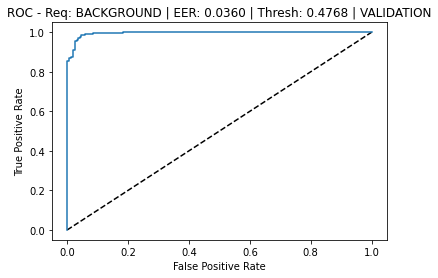

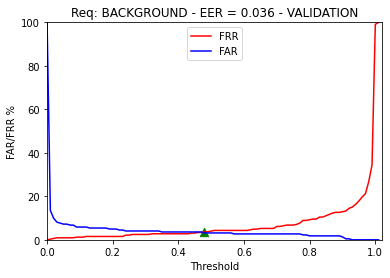

Requisite: BACKGROUND - EER_interp: 3.5999999999999996% - Best Threshold: 0.47682237625469504
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.95      0.96      0.96       222
    COMPLIANT       0.98      0.96      0.97       325

     accuracy                           0.96       547
    macro avg       0.96      0.96      0.96       547
 weighted avg       0.96      0.96      0.96       547

Confusion matrix ----------------------------------------
FAR: 3.5999999999999996% | FRR: 3.6900000000000004% | EER_mean: 3.64% | TP: 313 | TN: 214 | FP: 8 | FN: 12
Accuracy ------------------------------------------------
Model Accuracy: 96.34%
---------------------------------------------------------
Requisite: RED_EYES


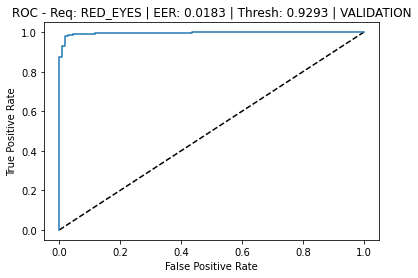

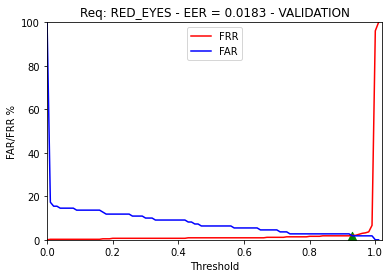

Requisite: RED_EYES - EER_interp: 1.83% - Best Threshold: 0.9292941919998665
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.93      0.98      0.96       110
    COMPLIANT       1.00      0.98      0.99       437

     accuracy                           0.98       547
    macro avg       0.96      0.98      0.97       547
 weighted avg       0.98      0.98      0.98       547

Confusion matrix ----------------------------------------
FAR: 1.82% | FRR: 1.83% | EER_mean: 1.83% | TP: 429 | TN: 108 | FP: 2 | FN: 8
Accuracy ------------------------------------------------
Model Accuracy: 98.17%
---------------------------------------------------------


In [17]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

Testing Trained Model
Predicting labels....
9/9 [==============================] - 18s 2s/step
Prediction finished!
Requisite: MOUTH


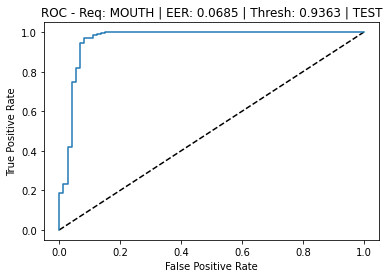

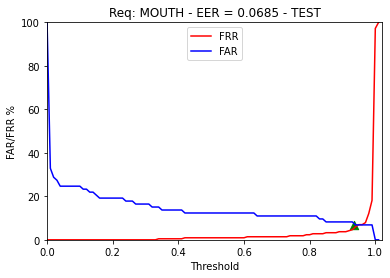

Requisite: MOUTH - EER_interp: 6.8500000000000005% - Best Threshold: 0.9362811446189604
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.85      0.93      0.89        73
    COMPLIANT       0.98      0.94      0.96       215

     accuracy                           0.94       288
    macro avg       0.91      0.94      0.92       288
 weighted avg       0.94      0.94      0.94       288

Confusion matrix ----------------------------------------
FAR: 6.8500000000000005% | FRR: 5.58% | EER_mean: 6.22% | TP: 203 | TN: 68 | FP: 5 | FN: 12
Accuracy ------------------------------------------------
Model Accuracy: 94.1%
---------------------------------------------------------
Requisite: ROTATION


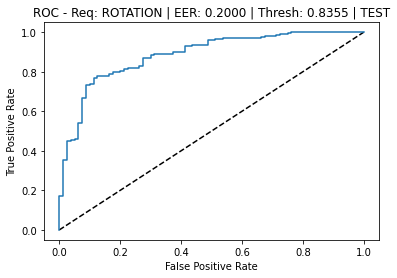

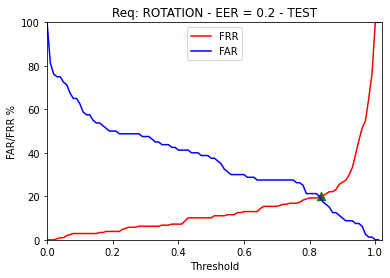

Requisite: ROTATION - EER_interp: 20.0% - Best Threshold: 0.835457503795669
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.60      0.80      0.69        80
    COMPLIANT       0.91      0.80      0.85       208

     accuracy                           0.80       288
    macro avg       0.76      0.80      0.77       288
 weighted avg       0.83      0.80      0.81       288

Confusion matrix ----------------------------------------
FAR: 20.0% | FRR: 20.19% | EER_mean: 20.1% | TP: 166 | TN: 64 | FP: 16 | FN: 42
Accuracy ------------------------------------------------
Model Accuracy: 79.86%
---------------------------------------------------------
Requisite: L_AWAY


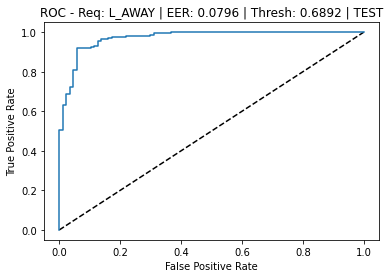

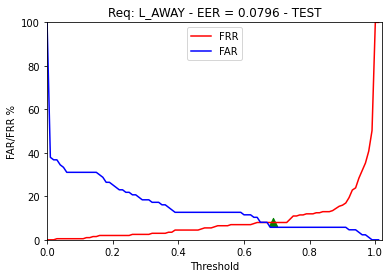

Requisite: L_AWAY - EER_interp: 7.960000000000001% - Best Threshold: 0.6891931684604332
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.84      0.94      0.89        87
    COMPLIANT       0.97      0.92      0.95       201

     accuracy                           0.93       288
    macro avg       0.91      0.93      0.92       288
 weighted avg       0.93      0.93      0.93       288

Confusion matrix ----------------------------------------
FAR: 5.75% | FRR: 7.960000000000001% | EER_mean: 6.859999999999999% | TP: 185 | TN: 82 | FP: 5 | FN: 16
Accuracy ------------------------------------------------
Model Accuracy: 92.71000000000001%
---------------------------------------------------------
Requisite: EYES_CLOSED


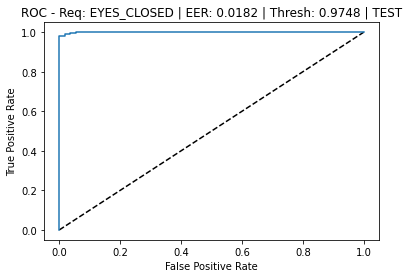

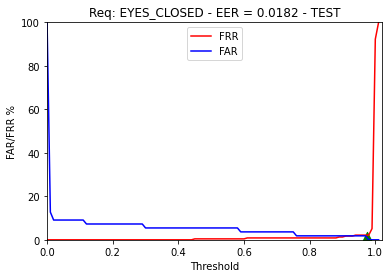

Requisite: EYES_CLOSED - EER_interp: 1.82% - Best Threshold: 0.9748354554179746
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.92      0.98      0.95        55
    COMPLIANT       1.00      0.98      0.99       233

     accuracy                           0.98       288
    macro avg       0.96      0.98      0.97       288
 weighted avg       0.98      0.98      0.98       288

Confusion matrix ----------------------------------------
FAR: 1.82% | FRR: 2.15% | EER_mean: 1.9800000000000002% | TP: 228 | TN: 54 | FP: 1 | FN: 5
Accuracy ------------------------------------------------
Model Accuracy: 97.92%
---------------------------------------------------------
Requisite: CLOSE


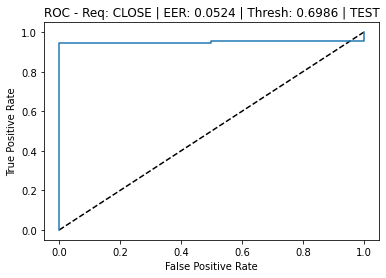

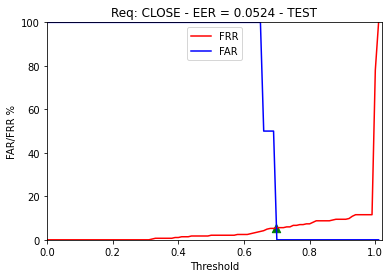

Requisite: CLOSE - EER_interp: 5.24% - Best Threshold: 0.698609807691374
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.12      1.00      0.21         2
    COMPLIANT       1.00      0.95      0.97       286

     accuracy                           0.95       288
    macro avg       0.56      0.97      0.59       288
 weighted avg       0.99      0.95      0.97       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 5.24% | EER_mean: 2.62% | TP: 271 | TN: 2 | FP: 0 | FN: 15
Accuracy ------------------------------------------------
Model Accuracy: 94.78999999999999%
---------------------------------------------------------
Requisite: HAT


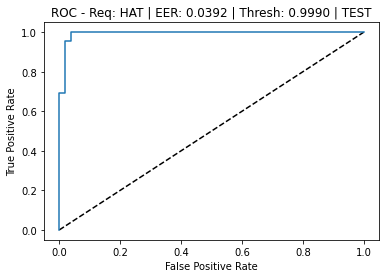

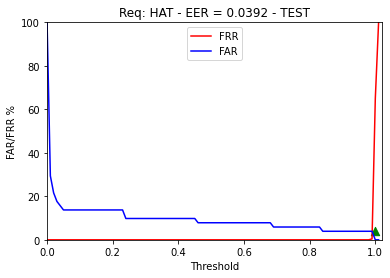

Requisite: HAT - EER_interp: 3.92% - Best Threshold: 0.9989927411079426
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.83      0.96      0.89        51
    COMPLIANT       0.99      0.96      0.97       237

     accuracy                           0.96       288
    macro avg       0.91      0.96      0.93       288
 weighted avg       0.96      0.96      0.96       288

Confusion matrix ----------------------------------------
FAR: 3.92% | FRR: 4.22% | EER_mean: 4.07% | TP: 227 | TN: 49 | FP: 2 | FN: 10
Accuracy ------------------------------------------------
Model Accuracy: 95.83%
---------------------------------------------------------
Requisite: DARK_GLASSES


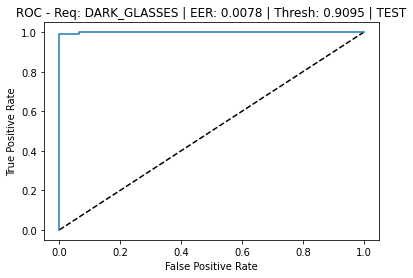

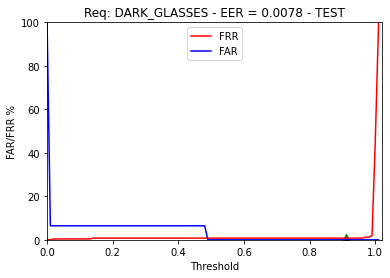

Requisite: DARK_GLASSES - EER_interp: 0.7799999999999999% - Best Threshold: 0.909477428123658
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.94      1.00      0.97        31
    COMPLIANT       1.00      0.99      1.00       257

     accuracy                           0.99       288
    macro avg       0.97      1.00      0.98       288
 weighted avg       0.99      0.99      0.99       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 0.7799999999999999% | EER_mean: 0.38999999999999996% | TP: 255 | TN: 31 | FP: 0 | FN: 2
Accuracy ------------------------------------------------
Model Accuracy: 99.31%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


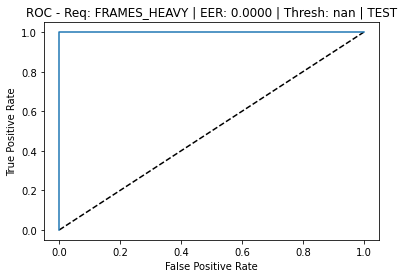

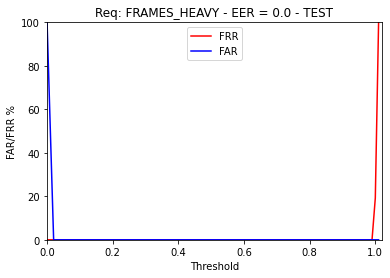

Requisite: FRAMES_HEAVY - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         2
    COMPLIANT       0.99      1.00      1.00       286

     accuracy                           0.99       288
    macro avg       0.50      0.50      0.50       288
 weighted avg       0.99      0.99      0.99       288

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 286 | TN: 0 | FP: 2 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.31%
---------------------------------------------------------
Requisite: FRAME_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


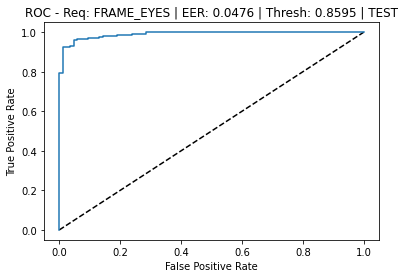

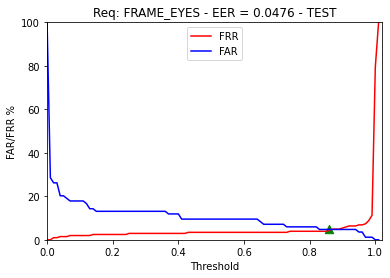

Requisite: FRAME_EYES - EER_interp: 4.760000000000001% - Best Threshold: 0.8594607710818247
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.91      0.95      0.93        84
    COMPLIANT       0.98      0.96      0.97       204

     accuracy                           0.96       288
    macro avg       0.94      0.96      0.95       288
 weighted avg       0.96      0.96      0.96       288

Confusion matrix ----------------------------------------
FAR: 4.760000000000001% | FRR: 3.92% | EER_mean: 4.34% | TP: 196 | TN: 80 | FP: 4 | FN: 8
Accuracy ------------------------------------------------
Model Accuracy: 95.83%
---------------------------------------------------------
Requisite: FLASH_LENSES


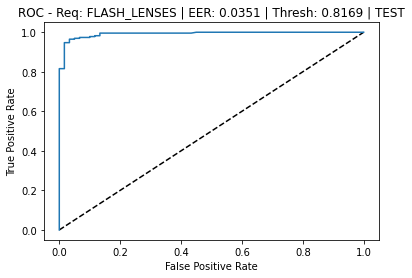

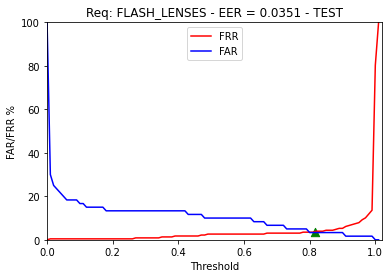

Requisite: FLASH_LENSES - EER_interp: 3.51% - Best Threshold: 0.8169285153087554
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.88      0.97      0.92        60
    COMPLIANT       0.99      0.96      0.98       228

     accuracy                           0.97       288
    macro avg       0.93      0.97      0.95       288
 weighted avg       0.97      0.97      0.97       288

Confusion matrix ----------------------------------------
FAR: 3.3300000000000005% | FRR: 3.51% | EER_mean: 3.42% | TP: 220 | TN: 58 | FP: 2 | FN: 8
Accuracy ------------------------------------------------
Model Accuracy: 96.53%
---------------------------------------------------------
Requisite: VEIL


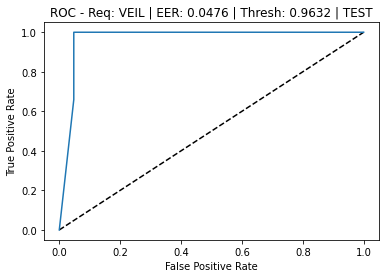

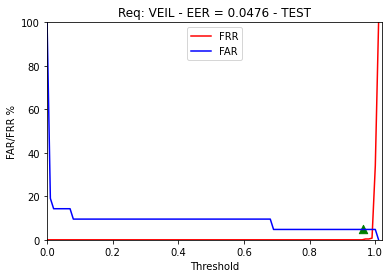

Requisite: VEIL - EER_interp: 4.760000000000001% - Best Threshold: 0.963187038898313
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.95      0.98        21
    COMPLIANT       1.00      1.00      1.00       267

     accuracy                           1.00       288
    macro avg       1.00      0.98      0.99       288
 weighted avg       1.00      1.00      1.00       288

Confusion matrix ----------------------------------------
FAR: 4.760000000000001% | FRR: 0.0% | EER_mean: 2.3800000000000003% | TP: 267 | TN: 20 | FP: 1 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.65%
---------------------------------------------------------
Requisite: REFLECTION


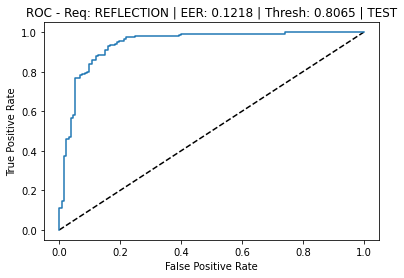

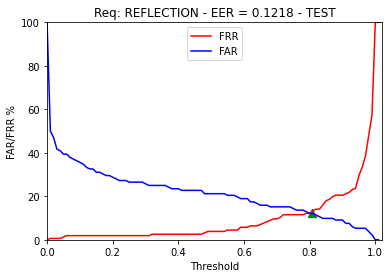

Requisite: REFLECTION - EER_interp: 12.18% - Best Threshold: 0.8065103613413297
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.86      0.88      0.87       132
    COMPLIANT       0.90      0.88      0.89       156

     accuracy                           0.88       288
    macro avg       0.88      0.88      0.88       288
 weighted avg       0.88      0.88      0.88       288

Confusion matrix ----------------------------------------
FAR: 12.120000000000001% | FRR: 12.18% | EER_mean: 12.15% | TP: 137 | TN: 116 | FP: 16 | FN: 19
Accuracy ------------------------------------------------
Model Accuracy: 87.85%
---------------------------------------------------------
Requisite: LIGHT


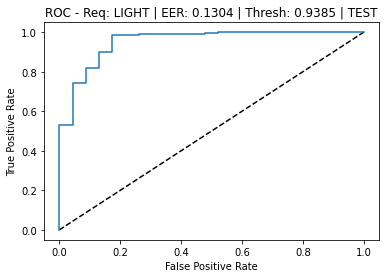

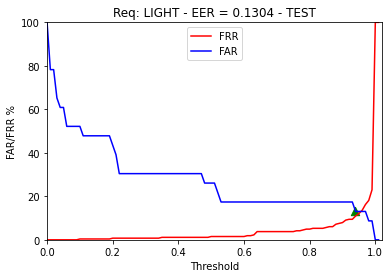

Requisite: LIGHT - EER_interp: 13.04% - Best Threshold: 0.9384886026382405
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.43      0.87      0.57        23
    COMPLIANT       0.99      0.90      0.94       265

     accuracy                           0.90       288
    macro avg       0.71      0.88      0.76       288
 weighted avg       0.94      0.90      0.91       288

Confusion matrix ----------------------------------------
FAR: 13.04% | FRR: 10.190000000000001% | EER_mean: 11.62% | TP: 238 | TN: 20 | FP: 3 | FN: 27
Accuracy ------------------------------------------------
Model Accuracy: 89.58%
---------------------------------------------------------
Requisite: SH_FACE


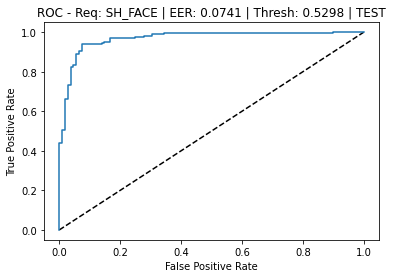

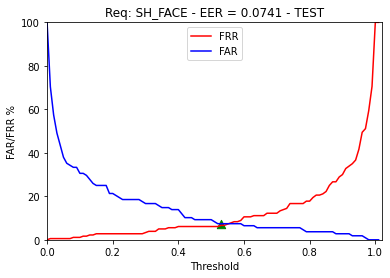

Requisite: SH_FACE - EER_interp: 7.41% - Best Threshold: 0.529799163340111
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.90      0.93      0.91       108
    COMPLIANT       0.95      0.94      0.95       180

     accuracy                           0.93       288
    macro avg       0.93      0.93      0.93       288
 weighted avg       0.93      0.93      0.93       288

Confusion matrix ----------------------------------------
FAR: 7.41% | FRR: 6.11% | EER_mean: 6.76% | TP: 169 | TN: 100 | FP: 8 | FN: 11
Accuracy ------------------------------------------------
Model Accuracy: 93.4%
---------------------------------------------------------
Requisite: SH_HEAD


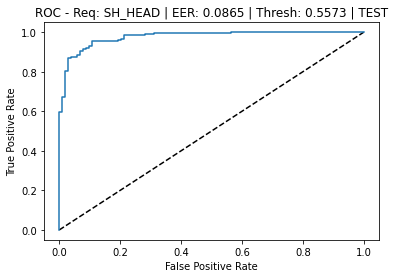

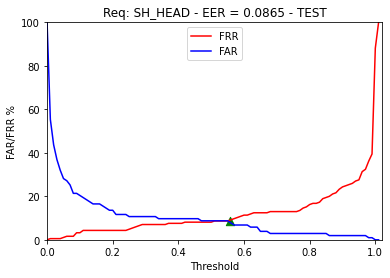

Requisite: SH_HEAD - EER_interp: 8.649999999999999% - Best Threshold: 0.5572614199406392
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.86      0.92      0.89       103
    COMPLIANT       0.95      0.91      0.93       185

     accuracy                           0.92       288
    macro avg       0.91      0.92      0.91       288
 weighted avg       0.92      0.92      0.92       288

Confusion matrix ----------------------------------------
FAR: 7.7700000000000005% | FRR: 8.649999999999999% | EER_mean: 8.21% | TP: 169 | TN: 95 | FP: 8 | FN: 16
Accuracy ------------------------------------------------
Model Accuracy: 91.67%
---------------------------------------------------------
Requisite: BLURRED


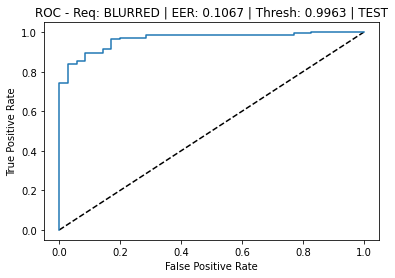

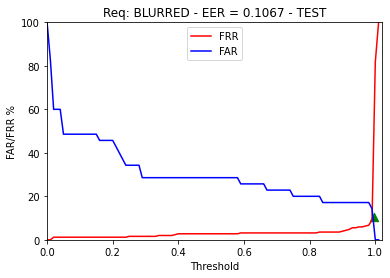

Requisite: BLURRED - EER_interp: 10.67% - Best Threshold: 0.996250988466466
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.54      0.91      0.68        35
    COMPLIANT       0.99      0.89      0.94       253

     accuracy                           0.90       288
    macro avg       0.76      0.90      0.81       288
 weighted avg       0.93      0.90      0.91       288

Confusion matrix ----------------------------------------
FAR: 8.57% | FRR: 10.67% | EER_mean: 9.62% | TP: 226 | TN: 32 | FP: 3 | FN: 27
Accuracy ------------------------------------------------
Model Accuracy: 89.58%
---------------------------------------------------------
Requisite: SKIN_TONE


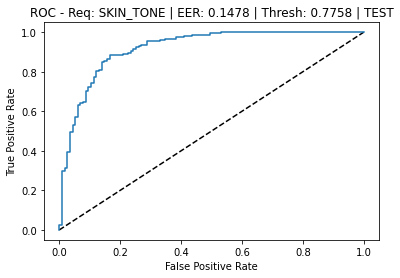

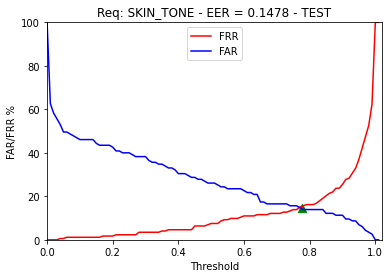

Requisite: SKIN_TONE - EER_interp: 14.78% - Best Threshold: 0.775840163230913
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.79      0.85      0.82       115
    COMPLIANT       0.90      0.85      0.87       173

     accuracy                           0.85       288
    macro avg       0.84      0.85      0.85       288
 weighted avg       0.85      0.85      0.85       288

Confusion matrix ----------------------------------------
FAR: 14.78% | FRR: 15.03% | EER_mean: 14.899999999999999% | TP: 147 | TN: 98 | FP: 17 | FN: 26
Accuracy ------------------------------------------------
Model Accuracy: 85.07000000000001%
---------------------------------------------------------
Requisite: WASHED_OUT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


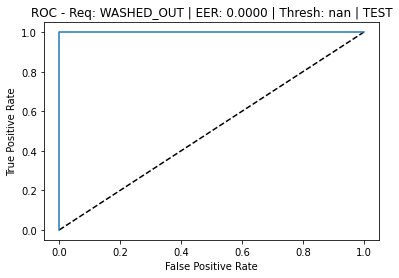

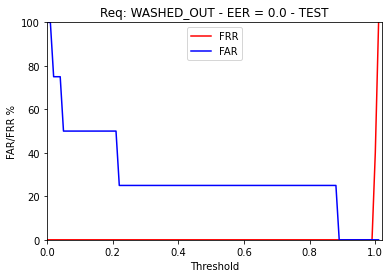

Requisite: WASHED_OUT - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         4
    COMPLIANT       0.99      1.00      0.99       284

     accuracy                           0.99       288
    macro avg       0.49      0.50      0.50       288
 weighted avg       0.97      0.99      0.98       288

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 284 | TN: 0 | FP: 4 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 98.61%
---------------------------------------------------------
Requisite: PIXELATION


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


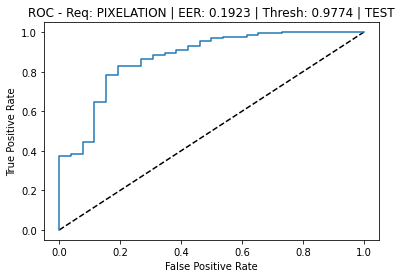

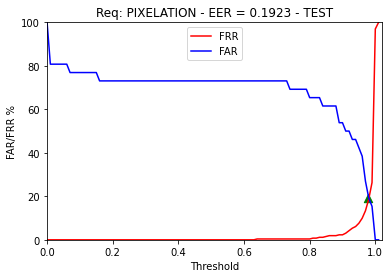

Requisite: PIXELATION - EER_interp: 19.23% - Best Threshold: 0.9773739576339652
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.32      0.81      0.46        26
    COMPLIANT       0.98      0.83      0.90       262

     accuracy                           0.83       288
    macro avg       0.65      0.82      0.68       288
 weighted avg       0.92      0.83      0.86       288

Confusion matrix ----------------------------------------
FAR: 19.23% | FRR: 17.18% | EER_mean: 18.2% | TP: 217 | TN: 21 | FP: 5 | FN: 45
Accuracy ------------------------------------------------
Model Accuracy: 82.64%
---------------------------------------------------------
Requisite: HAIR_EYES


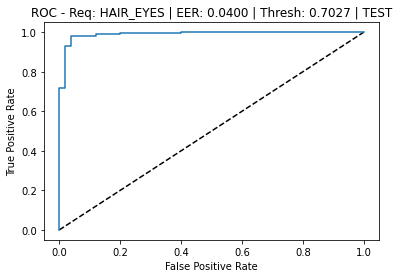

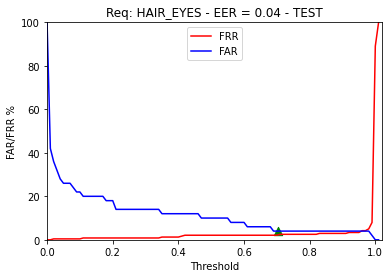

Requisite: HAIR_EYES - EER_interp: 4.0% - Best Threshold: 0.7026641964886102
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.91      0.96      0.93        50
    COMPLIANT       0.99      0.98      0.99       238

     accuracy                           0.98       288
    macro avg       0.95      0.97      0.96       288
 weighted avg       0.98      0.98      0.98       288

Confusion matrix ----------------------------------------
FAR: 4.0% | FRR: 2.1% | EER_mean: 3.05% | TP: 233 | TN: 48 | FP: 2 | FN: 5
Accuracy ------------------------------------------------
Model Accuracy: 97.57000000000001%
---------------------------------------------------------
Requisite: BACKGROUND


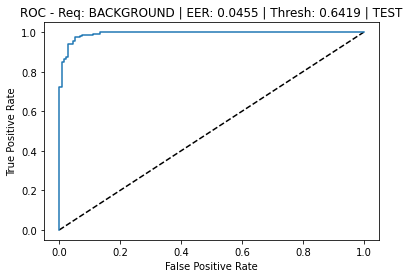

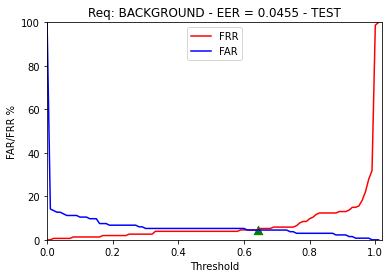

Requisite: BACKGROUND - EER_interp: 4.55% - Best Threshold: 0.6419005339795891
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.95      0.96      0.95       134
    COMPLIANT       0.96      0.95      0.96       154

     accuracy                           0.95       288
    macro avg       0.95      0.95      0.95       288
 weighted avg       0.95      0.95      0.95       288

Confusion matrix ----------------------------------------
FAR: 4.4799999999999995% | FRR: 4.55% | EER_mean: 4.51% | TP: 147 | TN: 128 | FP: 6 | FN: 7
Accuracy ------------------------------------------------
Model Accuracy: 95.49%
---------------------------------------------------------
Requisite: RED_EYES


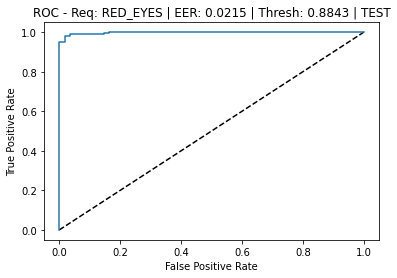

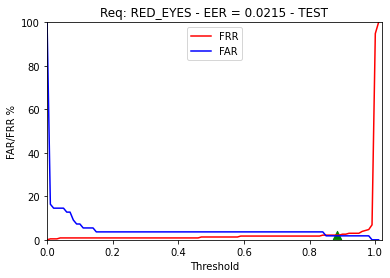

Requisite: RED_EYES - EER_interp: 2.15% - Best Threshold: 0.884311466768655
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.92      0.98      0.95        55
    COMPLIANT       1.00      0.98      0.99       233

     accuracy                           0.98       288
    macro avg       0.96      0.98      0.97       288
 weighted avg       0.98      0.98      0.98       288

Confusion matrix ----------------------------------------
FAR: 1.82% | FRR: 2.15% | EER_mean: 1.9800000000000002% | TP: 228 | TN: 54 | FP: 1 | FN: 5
Accuracy ------------------------------------------------
Model Accuracy: 97.92%
---------------------------------------------------------


In [18]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Vizualize Model Classification

# Finishing Experiment Manager

In [19]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune


Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
